# Introduction

The first test of your new data exploration skills uses data describing crime in the city of Chicago.

Before you get started, run the following cell. It sets up the automated feedback system to review your answers.

In [49]:
# Set up feedack system
from learntools.core import binder
binder.bind(globals())
from learntools.sql.ex1 import *
print("Setup Complete")

Setup Complete


Use the next code cell to fetch the dataset.

In [50]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

print("Is dataset found ? {}".format(dataset != None))

Using Kaggle's public dataset BigQuery integration.
Is dataset found ? True



### 1) Count tables in the dataset

How many tables are in the Chicago Crime dataset?

In [51]:
# Write the code you need here to figure out the answer
tables = list(client.list_tables(dataset))


In [52]:
num_tables = len(tables)

print("Number of table in dataset: {}".format(num_tables))

q_1.check()

Number of table in dataset: 1


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### 2) Explore the table schema

How many columns in the `crime` table have `TIMESTAMP` data?

In [54]:
# Construct a reference to the "full" table
tbl_crime_ref = dataset_ref.table("crime")

# API request - fetch the table
tbl_crime = client.get_table(tbl_crime_ref)

print("Is crime table found ? : {}".format(tbl_crime != None))

tbl_schema = tbl_crime.schema
timestamp_fields = [] # keep field name of columns whose data type is timestamp
for field in tbl_schema:
    if (field.field_type == "TIMESTAMP"):
        timestamp_fields.append(field.name)

print("Field name of columns whose data type is timestamp: {}".format(timestamp_fields))

Is crime table found ? : True
Field name of columns whose data type is timestamp: ['date', 'updated_on']


In [55]:
num_timestamp_fields = len(timestamp_fields) # Put your answer here

q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### 3) Create a crime map

If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the `crime` table to plot the crimes on a map?

In [57]:
# Preview the first five lines of the "crime" table
df = client.list_rows(tbl_crime, max_results=200).to_dataframe()

print(df.head())


#df.head(2)
#df[['x_coordinate', 'y_coordinate']]

   unique_key              ...                                     location
0    11719167              ...                                         None
1    11682293              ...                (41.973139321, -87.748331889)
2    11675601              ...                (41.982270338, -87.806941262)
3    11656981              ...                (41.983807384, -87.768323756)
4    11654695              ...                (41.717334211, -87.531658377)

[5 rows x 22 columns]


In [58]:
print(df[df['x_coordinate'].isnull()])

     unique_key case_number   ...    longitude location
0      11719167    JC302112   ...          NaN     None
37     11414018    JB393447   ...          NaN     None
100    10926657    JA239847   ...          NaN     None
102    10298034    HY464797   ...          NaN     None
106    10234106    HY422465   ...          NaN     None
150    11695638    JC273470   ...          NaN     None

[6 rows x 22 columns]


In [59]:
print(df[df['y_coordinate'].isnull()])

     unique_key case_number   ...    longitude location
0      11719167    JC302112   ...          NaN     None
37     11414018    JB393447   ...          NaN     None
100    10926657    JA239847   ...          NaN     None
102    10298034    HY464797   ...          NaN     None
106    10234106    HY422465   ...          NaN     None
150    11695638    JC273470   ...          NaN     None

[6 rows x 22 columns]


2 rows with index of 0 and 37 have nan.


In [60]:
# select x_coordinate & y_coordinate & eliminate NaN

df_cor = df[['x_coordinate', 'y_coordinate']]

df_cor = df_cor.dropna()


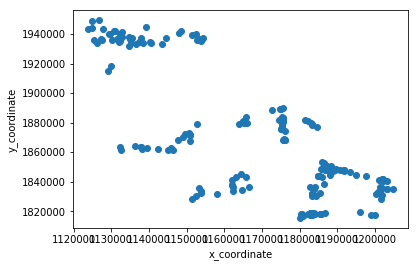

In [61]:
import matplotlib.pyplot as plt

plt.scatter(x=df_cor['x_coordinate'], y=df_cor['y_coordinate'])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.show()

In [62]:
fields_for_plotting = ['x_coordinate', 'y_coordinate'] # Put your answers here

q_3.check()

`'latitude'` and `'longitude'` would be better and more standard than `'x_coordinate'` and `'y_coordinate'`, but this might work.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Thinking about the question above, there are a few columns that appear to have geographic data. Look at a few values (with the `list_rows()` command) to see if you can determine their relationship.  Two columns will still be hard to interpret. But it should be obvious how the `location` column relates to `latitude` and `longitude`.

In [64]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11719167,JC302112,2019-06-06 09:00:00+00:00,092XX S YATES BLVD,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,False,423,4,7,48,11,NaN,NaN,2019,2019-06-13 16:12:38+00:00,NaN,NaN,None
1,11682293,JC257010,2019-05-09 22:00:00+00:00,050XX N ELSTON AVE,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,GAS STATION,False,True,1623,16,45,12,04A,1143328.0,1933345.0,2019,2019-05-16 16:08:26+00:00,41.973139,-87.748332,"(41.973139321, -87.748331889)"
2,11675601,JC249027,2019-05-04 01:30:00+00:00,055XX N HARLEM AVE,0545,ASSAULT,PRO EMP HANDS NO/MIN INJURY,CTA TRAIN,True,False,1612,16,41,10,08A,1127370.0,1936569.0,2019,2019-05-11 16:19:04+00:00,41.982270,-87.806941,"(41.982270338, -87.806941262)"
3,11656981,JC226713,2019-04-16 10:40:00+00:00,056XX N CENTRAL AVE,4388,OTHER OFFENSE,VIO BAIL BOND: DOM VIOLENCE,HOSPITAL BUILDING/GROUNDS,True,True,1623,16,45,11,26,1137866.0,1937196.0,2019,2019-04-23 16:22:49+00:00,41.983807,-87.768324,"(41.983807384, -87.768323756)"
4,11654695,JC223942,2019-04-14 04:14:00+00:00,098XX S AVENUE G,2028,NARCOTICS,POSS: SYNTHETIC DRUGS,PARK PROPERTY,True,False,432,4,10,52,18,1203118.0,1840607.0,2019,2019-04-21 16:07:03+00:00,41.717334,-87.531658,"(41.717334211, -87.531658377)"


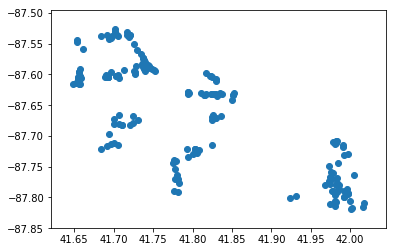

In [70]:
df_loc = df[['latitude', 'longitude']]

df_loc = df_loc.dropna()

plt.scatter(x = df_loc['latitude'], y = df_loc['longitude'])
plt.show()

# Keep going

You've looked at the schema, but you haven't yet done anything exciting with the data itself. Things get more interesting when you get to the data, so keep going to **[write your first SQL query](https://www.kaggle.com/dansbecker/select-from-where).**

---
**[SQL Micro-Course Home Page](https://www.kaggle.com/learn/intro-to-sql)**

